In [14]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy.constants as cst
import astropy.units as u
from heapq import nsmallest
from scipy.signal import find_peaks
from functions import vac2air_ciddor
from scipy.interpolate import interp1d
from lmfit.models import VoigtModel
from edibles.utils.voigt_profile import voigt_absorption_line
from lmfit import Model
from edibles.utils.ContinuumFitter import ContinuumFitter

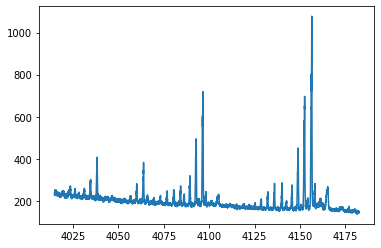

In [17]:

acenap = np.loadtxt("PERYLENE.DAT", skiprows=1).transpose()
#np.set_printoptions(threshold=np.inf)
#print(methnap)
acenap[0] = (1/acenap[0])*(10**8)         # converting from wno to wavelength in Angstrom
plt.plot(acenap[0], acenap[1])
plt.show()
data=acenap

datamol = data

datamol[0,:]=vac2air_ciddor(data[0,:])


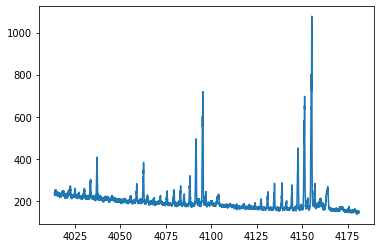

In [18]:
plt.plot(datamol[0,:], datamol[1,:])

In [19]:
cf1 = ContinuumFitter(datamol[0,:], datamol[1,:])
cf11, pts = cf1.SplineManualAnchor()


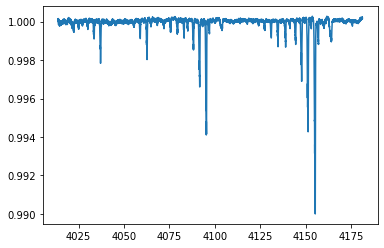

In [20]:
#Converting the data from vacuum env to air and normalising the intensity.



datamol[1,:]=1-0.01*(data[1,:]-(cf11(datamol[0,:])))/(np.max(data[1,:])-cf11(datamol[0, data[1,:] == np.max(data[1,:])]))

plt.plot(datamol[0,:], datamol[1,:])

In [21]:
cf2 = ContinuumFitter(datamol[0,:], datamol[1,:])
cf22 = cf2.SelectPoints(n=100, y_message=None)[:,0]

peaks = np.reshape(cf22, (int(cf22.size/2),2))
print(peaks)

[[4020.08004167 4023.64062717]
 [4024.60078485 4025.8009821 ]
 [4028.98150304 4031.28187955]
 [4032.64210188 4033.90230755]
 [4036.24268949 4037.96296983]
 [4054.2856187  4055.98589279]
 [4058.20625004 4060.22657464]
 [4061.52678373 4063.58711537]
 [4064.14720528 4065.30739191]
 [4071.00830418 4072.8886051 ]
 [4074.88892494 4077.04926912]
 [4078.40948552 4080.54982527]
 [4081.54998414 4084.07038426]
 [4084.41043805 4085.67063823]
 [4087.13086968 4089.29121121]
 [4090.95147381 4092.37169803]
 [4094.21198983 4095.87225055]
 [4096.21230376 4097.75254751]
 [4101.65316026 4104.93367445]
 [4123.39655121 4124.77676652]
 [4126.81708149 4128.37732269]
 [4129.83754769 4131.93787261]
 [4133.8781721  4135.47841712]
 [4137.6987599  4139.77907847]
 [4140.63921072 4141.83939451]
 [4143.21960684 4145.03988456]
 [4146.96017881 4149.02049231]
 [4149.72059958 4152.50102323]
 [4152.60103916 4153.36115477]
 [4154.32130131 4155.80152559]
 [4156.20158576 4157.66180763]
 [4158.88199371 4160.62225762]
 [4161.9

In [23]:
# Calculating standard deviation to calculate the noise in the data
sdar = datamol

for i3 in range(peaks.shape[0]):
    sdar = np.delete(sdar, np.logical_and(sdar[0,:]>=peaks[i3,0], sdar[0,:]<=peaks[i3,1]),1)
    
sd = np.std(sdar[1,:])
print(sd)

6.901247165430383e-05


In [35]:
# Function for voigt fitting the peaks of entire spectra
# input parameters: file_name, array of start & end points of peak, standard deviation


def voigtmultipeak(fdata, rang, sd):
    ar2={}
    No_Peaks=rang.shape[0]
    for i2 in range(No_Peaks):
        xfit_m = fdata[0, np.logical_and(fdata[0,:]>=rang[i2,0], fdata[0,:]<=rang[i2,1])]
        yfit_m = 1 - fdata[1, np.logical_and(fdata[0,:]>=rang[i2,0], fdata[0,:]<=rang[i2,1])]
        mod = VoigtModel()
        par = mod.guess(yfit_m, x=xfit_m)
        res = mod.fit(yfit_m, par, weights=1/sd, x=xfit_m)
        plt.plot(xfit_m, 1-res.best_fit, label='Fitted peak'+str(i2+1))
    
        cenkey = 'Center' + str(i2+1)
        fwhmkey = 'Fwhm' + str(i2+1)
        chisqkey = 'ChiSqr' + str(i2+1)
        rchisqkey = 'RedChiSqr' + str(i2+1)
        ar2.update({cenkey: res.params['center'].value})
        ar2.update({fwhmkey: res.params['fwhm'].value})
    ar2.update({'ChiSq': res.chisqr})
    ar2.update({'RedChiSq': res.redchi})
        
    return ar2

{'Center1': 4022.2074662658656, 'Fwhm1': 0.9705976223525711, 'Center2': 4025.049066421935, 'Fwhm2': 0.34316759123860835, 'Center3': 4030.1637687091797, 'Fwhm3': 0.3782632203262645, 'Center4': 4033.498117186921, 'Fwhm4': 0.4593991419055624, 'Center5': 4037.0951163961336, 'Fwhm5': 0.44600853630719806, 'Center6': 4055.505249135918, 'Fwhm6': 0.5092789890043383, 'Center7': 4058.9458632187298, 'Fwhm7': 0.3641548119086058, 'Center8': 4062.6576580346787, 'Fwhm8': 0.4175151968175904, 'Center9': 4064.8799855244756, 'Fwhm9': 0.22195512938945355, 'Center10': 4071.9777203181234, 'Fwhm10': 0.3088366165058442, 'Center11': 4075.623897438391, 'Fwhm11': 0.2840990506461004, 'Center12': 4079.402530680844, 'Fwhm12': 0.419896826667623, 'Center13': 4083.065383965163, 'Fwhm13': 0.2949705134906552, 'Center14': 4085.03411647959, 'Fwhm14': 0.41097361732307186, 'Center15': 4088.2025076795703, 'Fwhm15': 0.4588142830040714, 'Center16': 4091.5809247875704, 'Fwhm16': 0.5013665963222604, 'Center17': 4095.286811431535,

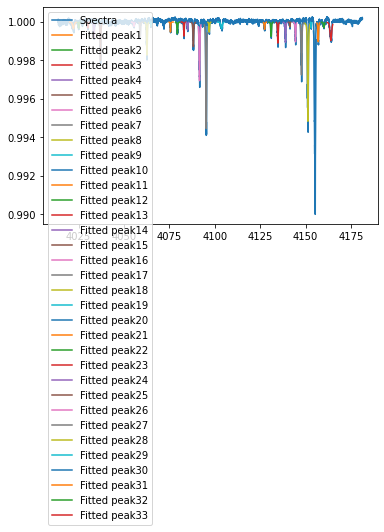

In [36]:
plt.plot(datamol[0,:],datamol[1,:], label='Spectra')
pk_fit_par = voigtmultipeak(datamol, peaks, sd)
plt.legend()
print(pk_fit_par)

In [37]:
stack_par = np.zeros((peaks.shape[0],2))

for i4 in range(peaks.shape[0]):
    p1 = 'Center' + str(i4+1)
    p2 = 'Fwhm' + str(i4+1)
    stack_par[i4,0] = pk_fit_par[p1]
    stack_par[i4,1] = pk_fit_par[p2]
    
print(stack_par)

[[4.02220747e+03 9.70597622e-01]
 [4.02504907e+03 3.43167591e-01]
 [4.03016377e+03 3.78263220e-01]
 [4.03349812e+03 4.59399142e-01]
 [4.03709512e+03 4.46008536e-01]
 [4.05550525e+03 5.09278989e-01]
 [4.05894586e+03 3.64154812e-01]
 [4.06265766e+03 4.17515197e-01]
 [4.06487999e+03 2.21955129e-01]
 [4.07197772e+03 3.08836617e-01]
 [4.07562390e+03 2.84099051e-01]
 [4.07940253e+03 4.19896827e-01]
 [4.08306538e+03 2.94970513e-01]
 [4.08503412e+03 4.10973617e-01]
 [4.08820251e+03 4.58814283e-01]
 [4.09158092e+03 5.01366596e-01]
 [4.09528681e+03 5.10736834e-01]
 [4.09694501e+03 3.97714506e-01]
 [4.10376531e+03 8.35024591e-01]
 [4.12413068e+03 2.59701029e-01]
 [4.12741606e+03 4.72390903e-01]
 [4.13103045e+03 4.24900098e-01]
 [4.13473111e+03 4.24184283e-01]
 [4.13890811e+03 4.46232589e-01]
 [4.14131225e+03 3.34617974e-01]
 [4.14441117e+03 4.31730913e-01]
 [4.14772020e+03 4.90214974e-01]
 [4.15126183e+03 5.22856971e-01]
 [4.15306716e+03 3.13288303e-01]
 [4.15517258e+03 5.73890421e-01]
 [4.156933

In [38]:
#Function for Spectral stacking, which takes in the input as filename and array having info about start and end points of peak. 

def spectral_stacker_voigt(fdata,peaks):
    
    No_Peaks = peaks.shape[0]
    fpeaks = np.empty(shape=No_Peaks, dtype=object)
    
    ffig, faxs = plt.subplots(3, 2, figsize=(12,15))
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    faxs[0,0].plot(fdata[0, :], fdata[1, :])
    faxs[0,0].set_title('Lab Spectrum')
    faxs[0,0].set(xlabel = 'Wavelength (Å)', ylabel = 'Relative intensity')
    
    
    # Creating separate arrays for each absorption in the spectra
    for i1 in range(No_Peaks):
        fpeaks[i1] = fdata[:,np.logical_and(fdata[0,:]>=peaks[i1,0]-2*peaks[i1,1], fdata[0,:]<=peaks[i1,0]+2*peaks[i1,1])]
        p = 'Peak'+str(i1+1)
        faxs[0,1].plot(fpeaks[i1][0,:], fpeaks[i1][1,:], label=p)
    faxs[0,1].set_title('Peaks')
    faxs[0,1].set(xlabel = 'Wavelength (Å)', ylabel = 'Relative intensity')
    faxs[0,1].legend()
    
    fDshft = fpeaks
    for j1 in range (No_Peaks):
        fDshft[j1][0,:] = fpeaks[j1][0,:]-peaks[j1,0]
        fDshft[j1][1,:] = fpeaks[j1][1,:]
        shp = 'Peak ' + str(j1+1)
        faxs[1, 0].plot(fDshft[j1][0,:], fDshft[j1][1,:], label = shp)
        
    faxs[1,0].set_title('Spectrum with peaks shifted')
    faxs[1,0].set(xlabel = 'Relative Wavelength (Å) (shifted by peak)', ylabel = 'Relative intensity')
    faxs[1,0].legend()
    
    fpoints = fDshft[0].shape[1]
    fstart = np.min(fDshft[0][0,:])
    fend = np.max(fDshft[0][0,:])
    for k1 in range(No_Peaks):
        if fDshft[k1].shape[1]>fpoints:
            fpoints = fDshft[k1].shape[1]
        if np.min(fDshft[k1][0,:]) > fstart:
            fstart = np.min(fDshft[k1][0,:])
        if np.max(fDshft[k1][0,:]) < fend:
            fend = np.max(fDshft[k1][0,:])
    fwavelength = np.linspace(fstart, fend, num = fpoints)  
    
            
    fitpn = np.empty(shape=No_Peaks, dtype=object)  
    for l1 in range(No_Peaks):
        fitpn[l1] = interp1d(fDshft[l1][0,:], fDshft[l1][1,:])
        
        
    ffin = np.zeros((2, fpoints))
    ffin[0,:] = fwavelength
    
    for m1 in range(No_Peaks):
        ffin[1,:] = ffin[1,:]+(fitpn[m1](fwavelength)/No_Peaks)
        pk1 = 'Peak' +str(m1+1)
        faxs[1,1].plot(fwavelength, fitpn[m1](fwavelength), label=pk1)         
        faxs[2,0].plot(fwavelength, fitpn[m1](fwavelength),label=pk1)
    faxs[1,1].set_title('Interpolated Peaks having same widths')
    faxs[1,1].set(xlabel = 'Relative Wavelength (Å) (shifted by peak)', ylabel = 'Relative intensity')
    faxs[1,1].legend()
    faxs[2,0].set_title('Interpolated Peaks with the stacked peak')
    faxs[2,0].set(xlabel = 'Relative Wavelength (Å) (shifted by peak)', ylabel = 'Relative intensity')
    faxs[2,0].legend()
        
    faxs[2,0].plot(ffin[0,:], ffin[1,:], label='Stacked spectra')
    faxs[2,0].legend()
    faxs[2,1].plot(ffin[0,:], ffin[1,:], label = 'Final Stacked peak')
    faxs[2,1].set_title('Only Stacked peak')
    faxs[2,1].set(xlabel = 'Relative Wavelength (Å)(shifted by peak)', ylabel = 'Relative intensity')
    faxs[2,1].legend()
    plt.subplots_adjust(hspace=0.3, wspace=0.2)

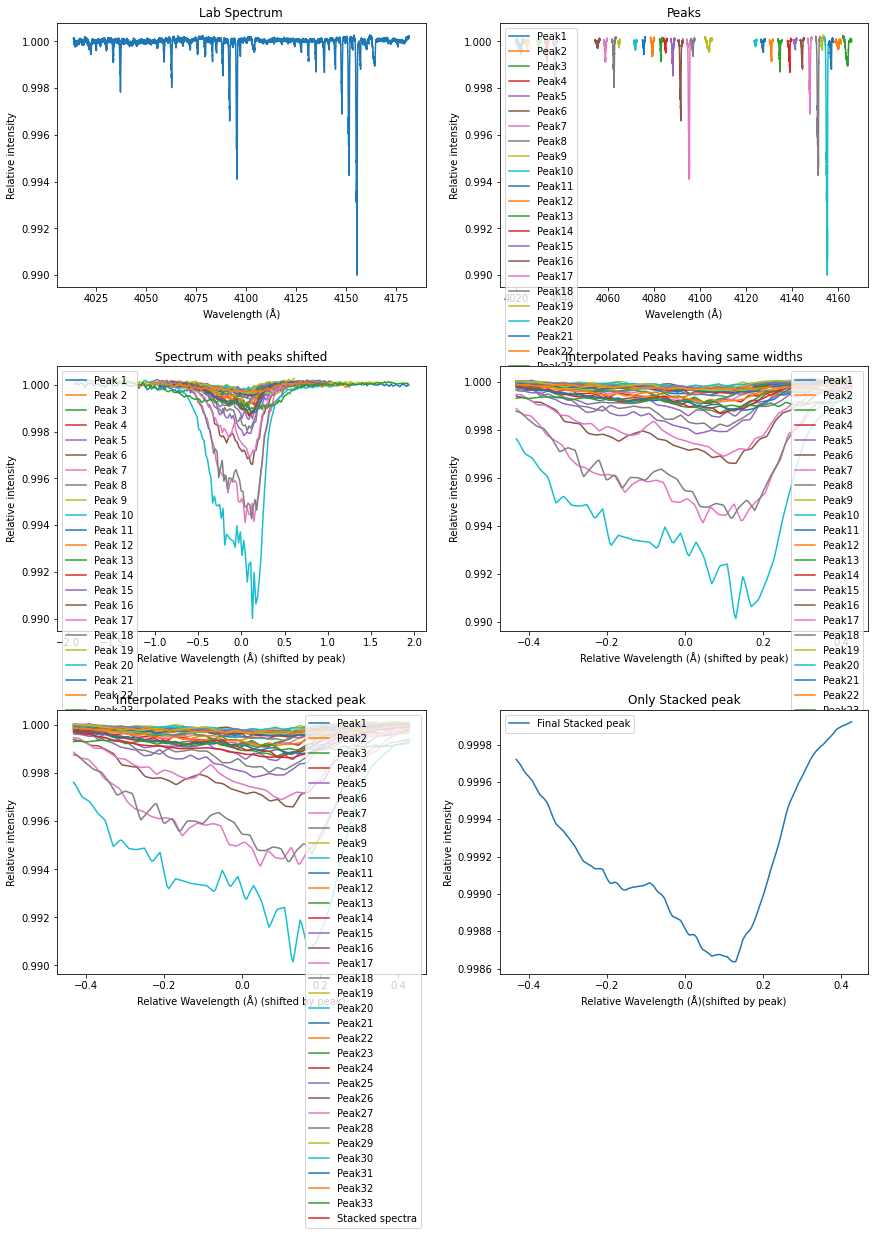

In [39]:
spectral_stacker_voigt(datamol, stack_par)